<a href="https://colab.research.google.com/github/ekaratnida/Applied-machine-learning/blob/master/Week02-LR/Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1.1 Normal equation (Numpy version)

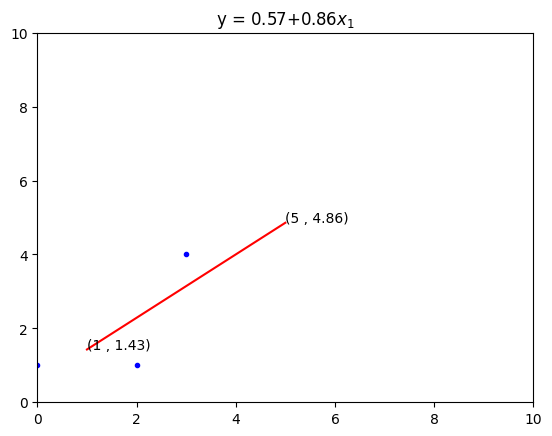

In [22]:
import numpy as np
np.set_printoptions(precision=2)

x = np.array([0,2,3])
y = np.array([1,1,4])
x_b = np.c_[np.ones((len(x),1)),x]

#call inverse function from linear algebra module
theta = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)
#print("theta = ", theta)

#prediction
x_p = np.array([1,5])
x_p_b = np.c_[np.ones((len(x_p),1)), x_p]
y_p = x_p_b.dot(theta)
#print("y predict = ",y_p)

import matplotlib.pyplot as plt
plt.title("y = "+str(np.round(theta[0],2))+"+"+str(np.round(theta[1],2))+r"$x_1$")
plt.plot(x_p, y_p,"r-")
plt.plot(x,y, "b.")
for x,y in zip(x_p,y_p):
  plt.text( x ,y, f"({np.round(x,2)} , {np.round(y,2)})")
plt.axis([0,10,0,10])
plt.show()


## 1.2 Normal equation (Sklearn version)

In [23]:
import numpy as np
from IPython.display import display, Latex
from sklearn.linear_model import LinearRegression
x = np.array([[0,2,3]]).T
y = np.array([1,1,4])

lin_reg = LinearRegression()
lin_reg.fit(x, y)
display(Latex(f'$y = {np.round(lin_reg.intercept_,2)}+{np.round(lin_reg.coef_[0],2)}x_{1}$'))
x_n = np.array([[1,5]]).T
ans = lin_reg.predict(x_n)
print("Predicted results = ")
print(ans)

<IPython.core.display.Latex object>

Predicted results = 
[1.43 4.86]


**Gradient descent**


In [24]:
import numpy as np
import random
import sklearn
import matplotlib.pyplot as plt
from scipy import stats

In [25]:
#Relation between key=theta, value=J
lossTheta0 = {}
lossTheta1 = {}

In [26]:
def cost_function(theta0, theta1, x, y, m):
    c = 1/(2*m) * sum([(theta0 + theta1*x[i] - y[i])**2 for i in range(m)])
    return c

In [27]:
def gradient_descent(alpha, x, y, ep=0.001, max_iter=10000):
  converged = False
  iter = 0
  m = x.shape[0] # number of samples

  # initial theta
  t0 = np.random.random(x.shape[1])
  print("Initial theta0 ",t0)

  t1 = np.random.random(x.shape[1])
  print("Initial theta01",t1)

  # total error, J(theta)
  J = cost_function(t0,t1,x,y,m)
  print("First j = ",J)

  lossTheta0[t0[0]] = J[0]
  lossTheta1[t1[0]] = J[0]

  # Iterate Loop
  while not converged:
    grad0 = sum([(t0 + t1*x[i] - y[i]) for i in range(m)])
    grad1 = sum([(t0 + t1*x[i] - y[i])*x[i] for i in range(m)])

    # update the theta_temp
    temp0 = t0 - alpha * (1/m) * grad0
    temp1 = t1 - alpha * (1/m) * grad1
    # update theta
    t0 = temp0
    t1 = temp1
    #print("\niter = ",iter)
    #print("t0 = ",t0)
    #print("t1 = ",t1)
    # error
    e = cost_function(t0,t1,x,y,m)
    #print("error = ",e)

    #Terminate 1
    if abs(J-e) <= ep:
        print("Converged at ", iter, "/", max_iter)
        converged = True

    J = e   # update error s
    iter += 1  # update iter

    if iter % 1 == 0:
      lossTheta0[t0[0]] = J[0]
      lossTheta1[t1[0]] = J[0]

    #Termiate 2
    if iter == max_iter:
        print('Max interactions exceeded!')
        converged = True

  return t0,t1


x.shape = (3, 1) y.shape = (3,)
Initial theta0  [0.02]
Initial theta01 [0.11]
First j =  [2.49]
Max interactions exceeded!
theta0 = [0.42] theta1 = [0.91]


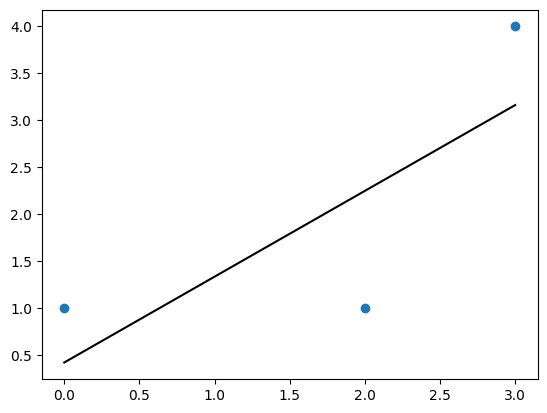

In [28]:
if __name__ == '__main__':

  x = np.array([[0,2,3]]).T # or x = np.array([[0],[2],[3]])
  y = np.array([1,1,4])
  print("x.shape = %s y.shape = %s" %(x.shape, y.shape))
  alpha = 0.01 # learning rate

  theta0, theta1 = gradient_descent(alpha, x, y,ep=0.000000001, max_iter=100)
  print (("theta0 = %s theta1 = %s") %(theta0, theta1))

  # plot
  for i in range(x.shape[0]):
      y_predict = theta0 + theta1*x

  plt.plot(x,y,'o')
  plt.plot(x,y_predict,'k-')
  plt.show()

#Gradient Descent curve Static VS Dynamic

101


Text(0, 0.5, '$Cost value (J)$')

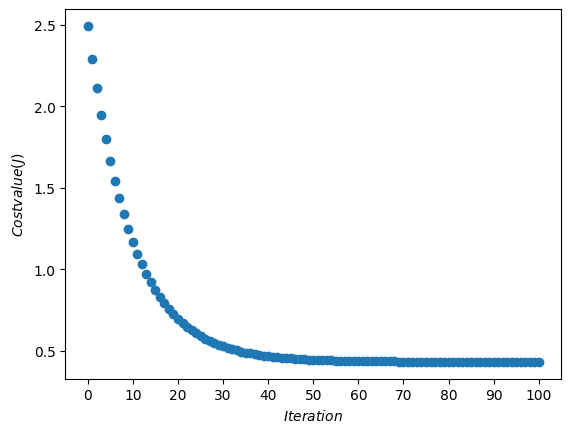

In [29]:
lists = sorted(lossTheta0.items()) # sorted by key, return a list of tuples
numPoints = len(lists)
print(numPoints)
_x, _y = zip(*lists) # unpack a list of pairs into two tuples
plt.scatter(range(numPoints),_y)
plt.xticks(range(0,numPoints,10))
plt.xlabel(r'$Iteration$')
plt.ylabel(r'$Cost value (J)$')

In [30]:
_x = list(_x)
_y = list(_y)
print(_x)
print(_y)

[0.02122847151032703, 0.03925746229070791, 0.05641049357834464, 0.07273147870317331, 0.08826212521123226, 0.10304204567550758, 0.11710886293998868, 0.13049831007659238, 0.14324432532056433, 0.15537914223662364, 0.16693337535544325, 0.17793610150802236, 0.18841493707407528, 0.1983961113497041, 0.20790453622931013, 0.21696387238690498, 0.22559659213268132, 0.2338240391118672, 0.24166648500449806, 0.24914318337677122, 0.25627242082707796, 0.26307156556262085, 0.26955711353569506, 0.2757447322622289, 0.2816493024390198, 0.2872849574702522, 0.2926651210083283, 0.29780254260876726, 0.30270933159391483, 0.3073969892154487, 0.3118764392011417, 0.31615805676705316, 0.32025169617224025, 0.32416671688920917, 0.3279120084596463, 0.33149601410147733, 0.33492675312998366, 0.33821184225255385, 0.3413585157936556, 0.3443736449037705, 0.3472637558033335, 0.35003504711015704, 0.3526934062963806, 0.3552444253186773, 0.35769341546324984, 0.3600454214450623, 0.3623052347987727, 0.36447740659694927, 0.36656

In [31]:
import plotly.graph_objects as go
import numpy as np

_x = list(_x)
_y = list(_y)
xm = np.min(_x) - 0.2
xM = np.max(_x) + 0.2
ym = np.min(_y) - 0.2
yM = np.max(_y) + 0.2
N = len(_x)

# Create figure
fig = go.Figure(
    data=[go.Scatter(x=_x, y=_y,
                     mode="lines",
                     line=dict(width=2, color="blue")),
          go.Scatter(x=_x, y=_y,
                     mode="lines",
                     line=dict(width=2, color="blue"))],

    layout=go.Layout(

        xaxis=dict(range=[xm, xM]),
        yaxis=dict(range=[ym, yM]),

        title_text="Gradient Descent",
        hovermode="closest",
        xaxis_title=r"$\theta_0$",
        yaxis_title="Cost function (J)",

        updatemenus=[
            dict(type="buttons",
                          buttons=[dict(label="Click to play",
                                        method="animate",
                                        args=[None])]
                 )
            ]
        ),

    frames=[go.Frame(
        data=[go.Scatter(
            x=[_x[k]],
            y=[_y[k]],
            mode="markers",
            marker=dict(color="red", size=10))])
        for k in range(0,N,5)],
)

fig.show()